## Utilization Prediction

### Import Libraries

In [1]:
import pandas as pd
import numpy as np

import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import RidgeCV
from sklearn.ensemble import RandomForestRegressor

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

%matplotlib inline

### Import Data

In [2]:
charging_sessions_data = pd.read_csv("cleaned_data.csv")
weather_data = pd.read_csv("cleaned_weather_data.csv")

charging_sessions_data

,id,connectionTime,disconnectTime,doneChargingTime,kWhDelivered,sessionID,siteID,spaceID,stationID,timezone,...,kWhRequested,milesRequested,minutesAvailable,requestedDeparture,hour,weekday,quarter,session_duration,idle_time,energy_ratio
0,5e23b149f9af8b5fe4b973d2,2020-01-02 05:59:58-08:00,2020-01-02 08:38:39-08:00,2020-01-02 07:18:45-08:00,2.355,1_1_193_820_2020-01-02 13:59:58.309319,1,AG-1F04,1-1-193-820,America/Los_Angeles,...,8.00,20.0,65.0,2020-01-02 15:04:58,5,3,1,2.644722,1.331667,0.294375
1,5e23b149f9af8b5fe4b973d4,2020-01-02 06:00:13-08:00,2020-01-02 15:00:41-08:00,2020-01-02 12:13:21-08:00,13.370,1_1_194_821_2020-01-02 14:00:05.241573,1,AG-1F13,1-1-194-821,America/Los_Angeles,...,24.00,40.0,624.0,2020-01-03 00:24:13,6,3,1,9.007778,2.788889,0.557083
2,5e23b149f9af8b5fe4b973d5,2020-01-02 06:09:14-08:00,2020-01-02 17:57:58-08:00,2020-01-02 16:59:21-08:00,43.477,1_1_178_817_2020-01-02 14:09:14.451827,1,AG-1F09,1-1-178-817,America/Los_Angeles,...,65.45,170.0,647.0,2020-01-03 00:56:14,6,3,1,11.812222,0.976944,0.664278
3,5e23b149f9af8b5fe4b973d6,2020-01-02 06:17:32-08:00,2020-01-02 16:44:54-08:00,2020-01-02 12:22:40-08:00,32.441,1_1_191_804_2020-01-02 14:17:32.329535,1,AG-4F34,1-1-191-804,America/Los_Angeles,...,45.00,150.0,126.0,2020-01-02 16:23:32,6,3,1,10.456111,4.370556,0.720911
4,5e23b149f9af8b5fe4b973d7,2020-01-02 06:25:38-08:00,2020-01-02 11:36:05-08:00,2020-01-02 10:38:39-08:00,13.264,1_1_194_826_2020-01-02 14:25:37.578692,1,AG-1F11,1-1-194-826,America/Los_Angeles,...,40.00,100.0,491.0,2020-01-02 22:36:38,6,3,1,5.174167,0.957222,0.331600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35223,5d2fbdd3f9af8b4d0dd0d53e,2019-07-01 09:07:55-07:00,2019-07-01 18:02:24-07:00,2019-07-01 11:07:36-07:00,5.694,1_1_191_802_2019-07-01 16:07:54.560922,1,AG-4F44,1-1-191-802,America/Los_Angeles,...,35.00,100.0,374.0,2019-07-01 22:21:55,9,0,3,8.908056,6.913333,0.162686
35224,5d2fbdd3f9af8b4d0dd0d541,2019-07-01 09:21:04-07:00,2019-07-01 17:34:07-07:00,2019-07-01 13:50:50-07:00,10.198,1_1_191_804_2019-07-01 16:21:03.523545,1,AG-4F34,1-1-191-804,America/Los_Angeles,...,20.00,50.0,418.0,2019-07-01 23:19:04,9,0,3,8.217500,3.721389,0.509900
35225,5d2fbdd3f9af8b4d0dd0d547,2019-07-01 12:43:46-07:00,2019-07-01 19:58:53-07:00,2019-07-01 19:43:53-07:00,41.047,1_1_191_793_2019-07-01 19:43:45.535911,1,AG-4F38,1-1-191-793,America/Los_Angeles,...,43.89,190.0,443.0,2019-07-02 03:06:46,12,0,3,7.251944,0.250000,0.935224
35226,5d2fbdd3f9af8b4d0dd0d549,2019-07-01 13:34:30-07:00,2019-07-01 17:30:52-07:00,2019-07-01 14:27:44-07:00,5.390,1_1_179_813_2019-07-01 20:34:17.241092,1,AG-3F15,1-1-179-813,America/Los_Angeles,...,12.00,40.0,381.0,2019-07-02 02:55:30,13,0,3,3.939444,3.052222,0.449167


In [3]:
charging_sessions_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35228 entries, 0 to 35227
Data columns (total 23 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  35228 non-null  object 
 1   connectionTime      35228 non-null  object 
 2   disconnectTime      35228 non-null  object 
 3   doneChargingTime    35228 non-null  object 
 4   kWhDelivered        35228 non-null  float64
 5   sessionID           35228 non-null  object 
 6   siteID              35228 non-null  int64  
 7   spaceID             35228 non-null  object 
 8   stationID           35228 non-null  object 
 9   timezone            35228 non-null  object 
 10  userID              35228 non-null  object 
 11  userInputs          35228 non-null  object 
 12  WhPerMile           35228 non-null  float64
 13  kWhRequested        35228 non-null  float64
 14  milesRequested      35228 non-null  float64
 15  minutesAvailable    35228 non-null  float64
 16  requ

In [4]:
# Due to the export to csv file the right format cannot be kept
# Therefore, the columns with datetime type need to be reformatted
# Due to the export to csv file the right format cannot be kept
# Therefore, the columns with datetime type need to be reformatted
charging_sessions_data["connectionTime"] = pd.to_datetime(charging_sessions_data["connectionTime"], utc=True)
charging_sessions_data["disconnectTime"] = pd.to_datetime(charging_sessions_data["disconnectTime"], utc=True)
charging_sessions_data["doneChargingTime"] = pd.to_datetime(charging_sessions_data["doneChargingTime"], utc=True)

charging_sessions_data['connectionTime'] = charging_sessions_data['connectionTime'].dt.tz_convert('America/Los_Angeles')
charging_sessions_data['disconnectTime'] = charging_sessions_data['disconnectTime'].dt.tz_convert('America/Los_Angeles')
charging_sessions_data['doneChargingTime'] = charging_sessions_data['doneChargingTime'].dt.tz_convert('America/Los_Angeles')

charging_sessions_data.dtypes
weather_data["timestamp"] = pd.to_datetime(weather_data["timestamp"])

### Developing Prediction Model on hourly Utilization -> connectiontime to disconnectiontime in hours
1. **Feature Engineering**
* Normalizing and standardizing data **(Angela)**
* Feature encoding (transforming categorical values into numerical values) **(Coco)**
* Determining features (Correlation) **(Marietta)**
* Join charging sessions and weather data **(Coco)**
2. **Find Optimal Machine Learning Method**
* Test different ML methods and evaluate them based on one metrics
    * Polynomial Regression **(Simon)**
    * Lasso Regression **(Simon)**
    * Ridge Regression **(Marietta)**
    * Random Forest **(Angela)**
    * Neural Network **(Coco)**
* Choose the ML methods demonstrating the best performance (Ridge Regression)
3. **Developing Predictive Models**
* Prediction models are developed for its charging site
* Develop predictive model using neural networks
* Develop predictive model using any other machine learning methods of choice (see Section 1.)
* Use cross-validation to train the models
* Compare predictive performance of both models on the same holdout set
* Determine the type of model the operator should employ
4. **Examples for Business Case**
* Visualize data prediction to support/ enables business case
* Make example predictions to support/ enables business case

### 1. Feature Engineering

#### 1.1. Data Standardization and Normalization

Standardizing and normalizing the data is important to improve the model performance since most models assume that the features are on a similar scale. The choice between standardization and normalization is dependent on the machine learning model. \
We have decided to standardize the data for Polynomial Regression, Lasso and Ridge Regression. Neural Networks can use either options, but normalization is often preferred. Thus, we will apply normalization to its data. \
Random Forest and other tree-based models are inherently insensitive to the scale of the features, so scaling the dataset does not impact performance. Therefore its training data does not require any scaling. \
It is important to note that the data should be scaled after splitting the dataset into training and test data to prevent data leakage and preserve the validity of the test results. Thus, this part demonstrate how data can be scaled accordingly.

##### 1.1.1. Charging Session Data Standardization and Normalization

In [5]:
charging_sessions_data.dtypes

id                                                 object
connectionTime        datetime64[ns, America/Los_Angeles]
disconnectTime        datetime64[ns, America/Los_Angeles]
doneChargingTime      datetime64[ns, America/Los_Angeles]
kWhDelivered                                      float64
sessionID                                          object
siteID                                              int64
spaceID                                            object
stationID                                          object
timezone                                           object
userID                                             object
userInputs                                         object
WhPerMile                                         float64
kWhRequested                                      float64
milesRequested                                    float64
minutesAvailable                                  float64
requestedDeparture                                 object
hour          

In [6]:
charging_sessions_data.columns

Index(['id', 'connectionTime', 'disconnectTime', 'doneChargingTime',
       'kWhDelivered', 'sessionID', 'siteID', 'spaceID', 'stationID',
       'timezone', 'userID', 'userInputs', 'WhPerMile', 'kWhRequested',
       'milesRequested', 'minutesAvailable', 'requestedDeparture', 'hour',
       'weekday', 'quarter', 'session_duration', 'idle_time', 'energy_ratio'],
      dtype='object')

In [7]:
# drop non-numerical data
scaled_charging_sessions_data = charging_sessions_data[['kWhDelivered', 'WhPerMile',
       'kWhRequested', 'milesRequested', 'minutesAvailable']]
scaled_charging_sessions_data.describe().round(3)

,kWhDelivered,WhPerMile,kWhRequested,milesRequested,minutesAvailable
count,35228.000,35228.000,35228.000,35228.000,35228.000
mean,11.156,253.282,15.866,45.421,238.900
std,9.774,191.913,19.423,56.243,228.612
min,0.501,0.000,0.000,0.000,0.000
25%,4.804,0.000,0.000,0.000,0.000
50%,8.674,300.000,11.680,30.000,196.000
75%,13.886,400.000,21.000,60.000,446.000
max,69.373,600.000,180.000,300.000,1560.000


In [8]:
# X1 is for standardized data and X2 is for normalized data
X1 = scaled_charging_sessions_data
X2 = scaled_charging_sessions_data

# standardize data
scaleStandard = StandardScaler()
X1 = scaleStandard.fit_transform(X1)
X1 = pd.DataFrame(X1, columns=['kWhDelivered', 'WhPerMile', 'kWhRequested', 'milesRequested', 'minutesAvailable'])
X1.describe().round(3)

,kWhDelivered,WhPerMile,kWhRequested,milesRequested,minutesAvailable
count,35228.000,35228.000,35228.000,35228.000,35228.000
mean,-0.000,-0.000,0.000,0.000,-0.000
std,1.000,1.000,1.000,1.000,1.000
min,-1.090,-1.320,-0.817,-0.808,-1.045
25%,-0.650,-1.320,-0.817,-0.808,-1.045
50%,-0.254,0.243,-0.216,-0.274,-0.188
75%,0.279,0.765,0.264,0.259,0.906
max,5.956,1.807,8.451,4.526,5.779


In [9]:
# normalize data
scaleMinMax = MinMaxScaler(feature_range=(0, 1))
X2 = scaleMinMax.fit_transform(X2)
X2 = pd.DataFrame(X2, columns=['kWhDelivered', 'WhPerMile', 'kWhRequested', 'milesRequested', 'minutesAvailable'])
X2.describe().round(3)

,kWhDelivered,WhPerMile,kWhRequested,milesRequested,minutesAvailable
count,35228.000,35228.000,35228.000,35228.000,35228.000
mean,0.155,0.422,0.088,0.151,0.153
std,0.142,0.320,0.108,0.187,0.147
min,0.000,0.000,0.000,0.000,0.000
25%,0.062,0.000,0.000,0.000,0.000
50%,0.119,0.500,0.065,0.100,0.126
75%,0.194,0.667,0.117,0.200,0.286
max,1.000,1.000,1.000,1.000,1.000


##### 1.1.2. Weather Data Standardization and Normalization

In [10]:
weather_data.dtypes

city                                       object
timestamp                          datetime64[ns]
temperature                               float64
cloud_cover                               float64
cloud_cover_description                    object
pressure                                  float64
windspeed                                 float64
precipitation                             float64
felt_temperature                          float64
cloud_cover_description_encoded           float64
dtype: object

In [11]:
weather_data.columns

Index(['city', 'timestamp', 'temperature', 'cloud_cover',
       'cloud_cover_description', 'pressure', 'windspeed', 'precipitation',
       'felt_temperature', 'cloud_cover_description_encoded'],
      dtype='object')

In [12]:
# drop non-numerical data
scaled_weather_data = weather_data[['temperature', 'cloud_cover', 'pressure', 'windspeed', 'precipitation',
       'felt_temperature']]
scaled_charging_sessions_data.describe().round(3)

,kWhDelivered,WhPerMile,kWhRequested,milesRequested,minutesAvailable
count,35228.000,35228.000,35228.000,35228.000,35228.000
mean,11.156,253.282,15.866,45.421,238.900
std,9.774,191.913,19.423,56.243,228.612
min,0.501,0.000,0.000,0.000,0.000
25%,4.804,0.000,0.000,0.000,0.000
50%,8.674,300.000,11.680,30.000,196.000
75%,13.886,400.000,21.000,60.000,446.000
max,69.373,600.000,180.000,300.000,1560.000


In [13]:
# X1 is for standardized data and X2 is for normalized data
X11 = scaled_weather_data
X22 = scaled_weather_data

# standardize data
scaleStandard = StandardScaler()
X11 = scaleStandard.fit_transform(X11)
X11 = pd.DataFrame(X11, columns=['temperature', 'cloud_cover', 'pressure', 'windspeed', 'precipitation',
       'felt_temperature'])
X11.describe().round(3)

,temperature,cloud_cover,pressure,windspeed,precipitation,felt_temperature
count,29142.000,29142.000,29142.000,29142.000,29142.000,29142.000
mean,0.000,0.000,0.000,-0.000,0.000,-0.000
std,1.000,1.000,1.000,1.000,1.000,1.000
min,-2.464,-4.875,-4.414,-1.296,-0.142,-2.809
25%,-0.759,-0.769,-0.664,-0.382,-0.142,-0.752
50%,-0.140,0.538,-0.114,-0.230,-0.142,-0.118
75%,0.635,0.724,0.617,0.684,-0.142,0.673
max,4.354,3.151,3.545,4.643,15.999,3.839


In [14]:
# normalize data
scaleMinMax = MinMaxScaler(feature_range=(0, 1))
X22 = scaleMinMax.fit_transform(X22)
X22 = pd.DataFrame(X22, columns=['temperature', 'cloud_cover', 'pressure', 'windspeed', 'precipitation',
       'felt_temperature'])
X22.describe().round(3)

,temperature,cloud_cover,pressure,windspeed,precipitation,felt_temperature
count,29142.000,29142.000,29142.000,29142.000,29142.000,29142.000
mean,0.361,0.607,0.555,0.218,0.009,0.423
std,0.147,0.125,0.126,0.168,0.062,0.150
min,0.000,0.000,0.000,0.000,0.000,0.000
25%,0.250,0.512,0.471,0.154,0.000,0.310
50%,0.341,0.674,0.540,0.179,0.000,0.405
75%,0.455,0.698,0.632,0.333,0.000,0.524
max,1.000,1.000,1.000,1.000,1.000,1.000


#### 1.2. Feature Enconding

In [15]:
# Encoding weekday 
weather_data["is_weekday"] = np.where(weather_data['timestamp'].dt.weekday.isin([5, 6]), 0, 1)
charging_sessions_data["is_weekday"] = np.where(charging_sessions_data['connectionTime'].dt.weekday.isin([5, 6]), 0, 1)

# Encoding siteID
charging_sessions_data["siteID"] = np.where(charging_sessions_data['siteID'] == 1, 1, 0)

# Extract hour and month
weather_data["month"] = weather_data['timestamp'].dt.month
weather_data["hour"] = weather_data['timestamp'].dt.hour
charging_sessions_data["month"] = charging_sessions_data['connectionTime'].dt.month
charging_sessions_data["hour"] = charging_sessions_data['connectionTime'].dt.hour

# Encoding hour by Sin-Cos Encoding
charging_sessions_data['hour_sin'] = np.sin(2 * np.pi * charging_sessions_data['hour'] / 24)
charging_sessions_data['hour_cos'] = np.cos(2 * np.pi * charging_sessions_data['hour'] / 24)

# Encoding month by Sin-Cos Encoding

charging_sessions_data['month_sin'] = np.sin(2 * np.pi * charging_sessions_data['month'] / 12)
charging_sessions_data['month_cos'] = np.cos(2 * np.pi * charging_sessions_data['month'] / 12)

In [16]:
weather_data.columns

Index(['city', 'timestamp', 'temperature', 'cloud_cover',
       'cloud_cover_description', 'pressure', 'windspeed', 'precipitation',
       'felt_temperature', 'cloud_cover_description_encoded', 'is_weekday',
       'month', 'hour'],
      dtype='object')

In [ ]:
# Lets group the table by month, hour and weekday to later join it in the charging data
# Therefore other attributes have to be averaged 
grouped_weather = ( weather_data
.groupby(['month', 'is_weekday', 'hour'])
.agg({
    'temperature': 'mean',   # Average temperature
    'precipitation': 'mean',      # Average precipitation
    'windspeed': 'mean', # Average windspeed
    'cloud_cover': 'mean', # Average cloud cover
    'pressure': 'mean'    # Average pressure
}).reset_index())
grouped_weather.rename(columns = {"temperature" : "avg_temperature", "precipitation": "avg_precipitation","windspeed":"avg_windspeed","cloud_cover":"avg_cloud","pressure":"avg_pressure"}, inplace = True)
grouped_weather

,month,is_weekday,hour,avg_temperature,avg_precipitation,avg_windspeed,avg_cloud,avg_pressure
0,1,0,0,17.640000,0.050800,8.840000,28.560000,990.364400
1,1,0,1,16.038462,0.000000,6.884615,29.653846,990.403846
2,1,0,2,14.875000,0.000000,4.625000,29.000000,991.184583
3,1,0,3,13.791667,0.010417,5.416667,30.250000,991.417500
4,1,0,4,13.040000,0.213200,6.440000,31.000000,991.588400
...,...,...,...,...,...,...,...,...
571,12,1,19,17.166667,0.006944,8.567130,31.652778,989.217917
572,12,1,20,17.726027,0.149589,8.762557,30.287671,988.382055
573,12,1,21,18.492754,0.095797,10.072464,30.724638,988.191884
574,12,1,22,18.573529,0.055882,12.029412,30.808824,988.081765


#### 1.3. Join charging sessions and weather data

In [18]:
# Now we merge weather data to charging session data on month, hour and is_weekday

merged_sessions = charging_sessions_data.merge(grouped_weather, on = ["month", "is_weekday", "hour"] )
merged_sessions = merged_sessions.drop(['spaceID','stationID','timezone','userID', 'userInputs'], axis = 1 )

Now that the session data contain all the recorded charging sessions with an addition of weather information, we have to think about how to map these to the target variable Utilization (each entry has to have a target variable)

In [19]:
merged_sessions

,id,connectionTime,disconnectTime,doneChargingTime,kWhDelivered,sessionID,siteID,WhPerMile,kWhRequested,milesRequested,...,month,hour_sin,hour_cos,month_sin,month_cos,avg_temperature,avg_precipitation,avg_windspeed,avg_cloud,avg_pressure
0,5e23b149f9af8b5fe4b973d2,2020-01-02 05:59:58-08:00,2020-01-02 08:38:39-08:00,2020-01-02 07:18:45-08:00,2.355,1_1_193_820_2020-01-02 13:59:58.309319,1,400.0,8.00,20.0,...,1,9.659258e-01,2.588190e-01,0.5,0.866025,12.878378,0.006892,7.621622,28.959459,990.799459
1,5e23b149f9af8b5fe4b973d4,2020-01-02 06:00:13-08:00,2020-01-02 15:00:41-08:00,2020-01-02 12:13:21-08:00,13.370,1_1_194_821_2020-01-02 14:00:05.241573,1,600.0,24.00,40.0,...,1,1.000000e+00,6.123234e-17,0.5,0.866025,12.289474,0.083421,6.197368,28.592105,990.945921
2,5e23b149f9af8b5fe4b973d5,2020-01-02 06:09:14-08:00,2020-01-02 17:57:58-08:00,2020-01-02 16:59:21-08:00,43.477,1_1_178_817_2020-01-02 14:09:14.451827,1,385.0,65.45,170.0,...,1,1.000000e+00,6.123234e-17,0.5,0.866025,12.289474,0.083421,6.197368,28.592105,990.945921
3,5e23b149f9af8b5fe4b973d6,2020-01-02 06:17:32-08:00,2020-01-02 16:44:54-08:00,2020-01-02 12:22:40-08:00,32.441,1_1_191_804_2020-01-02 14:17:32.329535,1,300.0,45.00,150.0,...,1,1.000000e+00,6.123234e-17,0.5,0.866025,12.289474,0.083421,6.197368,28.592105,990.945921
4,5e23b149f9af8b5fe4b973d7,2020-01-02 06:25:38-08:00,2020-01-02 11:36:05-08:00,2020-01-02 10:38:39-08:00,13.264,1_1_194_826_2020-01-02 14:25:37.578692,1,400.0,40.00,100.0,...,1,1.000000e+00,6.123234e-17,0.5,0.866025,12.289474,0.083421,6.197368,28.592105,990.945921
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35223,5d2fbdd3f9af8b4d0dd0d53e,2019-07-01 09:07:55-07:00,2019-07-01 18:02:24-07:00,2019-07-01 11:07:36-07:00,5.694,1_1_191_802_2019-07-01 16:07:54.560922,1,350.0,35.00,100.0,...,7,7.071068e-01,-7.071068e-01,-0.5,-0.866025,19.375000,0.000000,6.888889,30.777778,985.248611
35224,5d2fbdd3f9af8b4d0dd0d541,2019-07-01 09:21:04-07:00,2019-07-01 17:34:07-07:00,2019-07-01 13:50:50-07:00,10.198,1_1_191_804_2019-07-01 16:21:03.523545,1,400.0,20.00,50.0,...,7,7.071068e-01,-7.071068e-01,-0.5,-0.866025,19.375000,0.000000,6.888889,30.777778,985.248611
35225,5d2fbdd3f9af8b4d0dd0d547,2019-07-01 12:43:46-07:00,2019-07-01 19:58:53-07:00,2019-07-01 19:43:53-07:00,41.047,1_1_191_793_2019-07-01 19:43:45.535911,1,231.0,43.89,190.0,...,7,1.224647e-16,-1.000000e+00,-0.5,-0.866025,18.587500,0.000000,5.275000,30.412500,985.597500
35226,5d2fbdd3f9af8b4d0dd0d549,2019-07-01 13:34:30-07:00,2019-07-01 17:30:52-07:00,2019-07-01 14:27:44-07:00,5.390,1_1_179_813_2019-07-01 20:34:17.241092,1,300.0,12.00,40.0,...,7,-2.588190e-01,-9.659258e-01,-0.5,-0.866025,18.962963,0.000000,5.037037,30.493827,985.930123


In [20]:
merged_sessions.columns

Index(['id', 'connectionTime', 'disconnectTime', 'doneChargingTime',
       'kWhDelivered', 'sessionID', 'siteID', 'WhPerMile', 'kWhRequested',
       'milesRequested', 'minutesAvailable', 'requestedDeparture', 'hour',
       'weekday', 'quarter', 'session_duration', 'idle_time', 'energy_ratio',
       'is_weekday', 'month', 'hour_sin', 'hour_cos', 'month_sin', 'month_cos',
       'avg_temperature', 'avg_precipitation', 'avg_windspeed', 'avg_cloud',
       'avg_pressure'],
      dtype='object')

### 2. Find Optimal Machine Learning Method

#### 2.1. Predicting Utilization Value

In [21]:
charging_sessions_data.columns

Index(['id', 'connectionTime', 'disconnectTime', 'doneChargingTime',
       'kWhDelivered', 'sessionID', 'siteID', 'spaceID', 'stationID',
       'timezone', 'userID', 'userInputs', 'WhPerMile', 'kWhRequested',
       'milesRequested', 'minutesAvailable', 'requestedDeparture', 'hour',
       'weekday', 'quarter', 'session_duration', 'idle_time', 'energy_ratio',
       'is_weekday', 'month', 'hour_sin', 'hour_cos', 'month_sin',
       'month_cos'],
      dtype='object')

In [22]:
# count the stations for each siteID 
stations_per_site = charging_sessions_data.groupby('siteID')['stationID'].nunique().reset_index()
stations_per_site.rename(columns={'stationID': 'total_stations'}, inplace=True)

print(stations_per_site)

   siteID  total_stations
0       0              54
1       1              52


In [23]:
# Calculate the duration of each session
# charging_sessions_data['connectionTime'] = pd.to_datetime(charging_sessions_data['connectionTime'])
# charging_sessions_data['disconnectTime'] = pd.to_datetime(charging_sessions_data['disconnectTime'])
charging_sessions_data['duration'] = (charging_sessions_data['disconnectTime'] - charging_sessions_data['connectionTime']).dt.total_seconds() / 3600  # duration in hours

# Summarise the loading times per hour and site
hourly_utilization = charging_sessions_data.groupby(['connectionTime', 'siteID']).agg(
    active_time=('duration', 'sum'),  # sum of the loading time in hours
).reset_index()

# Add the total number of stations for each site
hourly_utilization = hourly_utilization.merge(stations_per_site, on='siteID', how='left')

# Calculate the utilization per hour
hourly_utilization['utilization'] = hourly_utilization['active_time'] / (hourly_utilization['total_stations'])

#Check the first five results
print(hourly_utilization)

# prediciting utilization value

                 connectionTime  siteID  active_time  total_stations  \
0     2018-04-25 07:37:06-07:00       0     9.307778              54   
1     2018-04-25 07:43:50-07:00       0    10.561111              54   
2     2018-04-25 07:47:42-07:00       0     3.669167              54   
3     2018-04-25 07:58:25-07:00       0     4.134444              54   
4     2018-04-25 08:10:52-07:00       0     3.081667              54   
...                         ...     ...          ...             ...   
35145 2020-03-30 06:11:51-07:00       1    11.132222              52   
35146 2020-03-30 06:35:33-07:00       1     8.838333              52   
35147 2020-03-30 09:12:48-07:00       1     6.505556              52   
35148 2020-03-31 06:26:34-07:00       1    10.311667              52   
35149 2020-03-31 06:59:03-07:00       1    11.544722              52   

       utilization  
0         0.172366  
1         0.195576  
2         0.067948  
3         0.076564  
4         0.057068  
...      

In [24]:
merged_sessions = merged_sessions.merge(
    hourly_utilization[['connectionTime', 'siteID', 'utilization']],  
    on=['connectionTime', 'siteID'],  # same columsn for the merge
    how='left'  # all columns from charging session data should remain 
)
# check
merged_sessions.head()

,id,connectionTime,disconnectTime,doneChargingTime,kWhDelivered,sessionID,siteID,WhPerMile,kWhRequested,milesRequested,...,hour_sin,hour_cos,month_sin,month_cos,avg_temperature,avg_precipitation,avg_windspeed,avg_cloud,avg_pressure,utilization
0,5e23b149f9af8b5fe4b973d2,2020-01-02 05:59:58-08:00,2020-01-02 08:38:39-08:00,2020-01-02 07:18:45-08:00,2.355,1_1_193_820_2020-01-02 13:59:58.309319,1,400.0,8.00,20.0,...,0.965926,2.588190e-01,0.5,0.866025,12.878378,0.006892,7.621622,28.959459,990.799459,0.050860
1,5e23b149f9af8b5fe4b973d4,2020-01-02 06:00:13-08:00,2020-01-02 15:00:41-08:00,2020-01-02 12:13:21-08:00,13.370,1_1_194_821_2020-01-02 14:00:05.241573,1,600.0,24.00,40.0,...,1.000000,6.123234e-17,0.5,0.866025,12.289474,0.083421,6.197368,28.592105,990.945921,0.173226
2,5e23b149f9af8b5fe4b973d5,2020-01-02 06:09:14-08:00,2020-01-02 17:57:58-08:00,2020-01-02 16:59:21-08:00,43.477,1_1_178_817_2020-01-02 14:09:14.451827,1,385.0,65.45,170.0,...,1.000000,6.123234e-17,0.5,0.866025,12.289474,0.083421,6.197368,28.592105,990.945921,0.227158
3,5e23b149f9af8b5fe4b973d6,2020-01-02 06:17:32-08:00,2020-01-02 16:44:54-08:00,2020-01-02 12:22:40-08:00,32.441,1_1_191_804_2020-01-02 14:17:32.329535,1,300.0,45.00,150.0,...,1.000000,6.123234e-17,0.5,0.866025,12.289474,0.083421,6.197368,28.592105,990.945921,0.201079
4,5e23b149f9af8b5fe4b973d7,2020-01-02 06:25:38-08:00,2020-01-02 11:36:05-08:00,2020-01-02 10:38:39-08:00,13.264,1_1_194_826_2020-01-02 14:25:37.578692,1,400.0,40.00,100.0,...,1.000000,6.123234e-17,0.5,0.866025,12.289474,0.083421,6.197368,28.592105,990.945921,0.099503


In [25]:
merged_sessions.columns

Index(['id', 'connectionTime', 'disconnectTime', 'doneChargingTime',
       'kWhDelivered', 'sessionID', 'siteID', 'WhPerMile', 'kWhRequested',
       'milesRequested', 'minutesAvailable', 'requestedDeparture', 'hour',
       'weekday', 'quarter', 'session_duration', 'idle_time', 'energy_ratio',
       'is_weekday', 'month', 'hour_sin', 'hour_cos', 'month_sin', 'month_cos',
       'avg_temperature', 'avg_precipitation', 'avg_windspeed', 'avg_cloud',
       'avg_pressure', 'utilization'],
      dtype='object')

#### 2.2. Determining Features (Correlation)

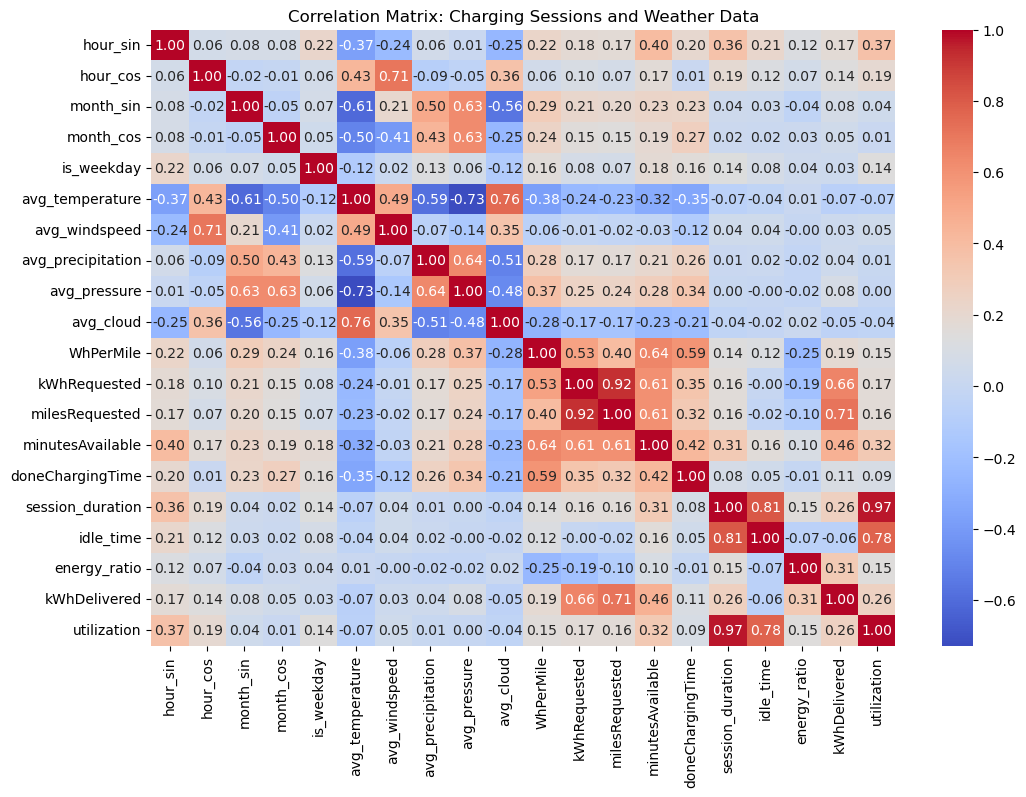

In [26]:
# choice of relevant numeric features 
correlation_features = [
    'hour_sin', 'hour_cos', 'month_sin', 'month_cos', 'is_weekday',
    'avg_temperature', 'avg_windspeed',  'avg_precipitation', 'avg_pressure', 'avg_cloud',
    'WhPerMile', 'kWhRequested', 'milesRequested', 'minutesAvailable', 'doneChargingTime',
    'session_duration', 'idle_time', 'energy_ratio', 'kWhDelivered', 'utilization' 
]

# calculate the correlation 
correlation_matrix = merged_sessions[correlation_features].corr()

# plot a heatmap of the correlation 
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix: Charging Sessions and Weather Data')
plt.show()
### 2. Find Optimal Machine Learning Method

In [27]:
merged_sessions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35228 entries, 0 to 35227
Data columns (total 30 columns):
 #   Column              Non-Null Count  Dtype                              
---  ------              --------------  -----                              
 0   id                  35228 non-null  object                             
 1   connectionTime      35228 non-null  datetime64[ns, America/Los_Angeles]
 2   disconnectTime      35228 non-null  datetime64[ns, America/Los_Angeles]
 3   doneChargingTime    35228 non-null  datetime64[ns, America/Los_Angeles]
 4   kWhDelivered        35228 non-null  float64                            
 5   sessionID           35228 non-null  object                             
 6   siteID              35228 non-null  int32                              
 7   WhPerMile           35228 non-null  float64                            
 8   kWhRequested        35228 non-null  float64                            
 9   milesRequested      35228 non-null  flo

#### 2.3. Polynomial Regression

In [28]:
# Make a copy (not strictly required, but good practice)
merged_sessions_poly = merged_sessions.copy()

# Drop rows with NaN in session_duration, idle_time, or utilization
cols_needed = ['session_duration', 'idle_time', 'utilization']
merged_sessions_poly = merged_sessions_poly.dropna(subset=cols_needed)

# Select features and target
X_poly = merged_sessions_poly[['session_duration', 'idle_time']]
y_poly = merged_sessions_poly['utilization']

# 60/20/20 split
X_train, X_temp, y_train, y_temp = train_test_split(
    X_poly, 
    y_poly, 
    test_size=0.4,   # 40% for test+holdout
    random_state=42
)
X_test, X_holdout, y_test, y_holdout = train_test_split(
    X_temp, 
    y_temp, 
    test_size=0.5,   # split temp 50/50 => 20/20
    random_state=42
)

# Create polynomial features (degree=2, no bias)
poly = PolynomialFeatures(degree=2, include_bias=False)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)
X_holdout_poly = poly.transform(X_holdout)

# Fit a linear model on the polynomial-transformed features
poly_model = LinearRegression()
poly_model.fit(X_train_poly, y_train)

# Predict on train, test, holdout
y_pred_train = poly_model.predict(X_train_poly)
y_pred_test = poly_model.predict(X_test_poly)
y_pred_holdout = poly_model.predict(X_holdout_poly)

# Evaluate metrics for train, test, holdout
train_r2 = r2_score(y_train, y_pred_train)
train_mse = mean_squared_error(y_train, y_pred_train)

test_r2 = r2_score(y_test, y_pred_test)
test_mse = mean_squared_error(y_test, y_pred_test)

holdout_r2 = r2_score(y_holdout, y_pred_holdout)
holdout_mse = mean_squared_error(y_holdout, y_pred_holdout)

# Print results
print("Polynomial Regression with 'session_duration' and 'idle_time' -> Target: 'utilization'")
print(f"Train R²: {train_r2:.4f}")
print(f"Train MSE: {train_mse:.6f}")
print(f"Test R²:  {test_r2:.4f}")
print(f"Test MSE:  {test_mse:.6f}")
print(f"Holdout R²: {holdout_r2:.4f}")
print(f"Holdout MSE: {holdout_mse:.6f}")


Polynomial Regression with 'session_duration' and 'idle_time' -> Target: 'utilization'
Train R²: 0.9466
Train MSE: 0.000495
Test R²:  0.9254
Test MSE:  0.000662
Holdout R²: 0.9285
Holdout MSE: 0.000708


#### 2.4. Lasso Regression

In [29]:
# Make a copy of your DataFrame (optional, but good practice)
merged_sessions_lasso = merged_sessions.copy()

# Drop rows that have NaN in any relevant columns:
#    We need 'session_duration', 'idle_time', AND 'utilization' to be valid
needed_cols = ['session_duration', 'idle_time', 'utilization']
merged_sessions_lasso = merged_sessions_lasso.dropna(subset=needed_cols)

# Define features (X) and target (y)
X_lasso = merged_sessions_lasso[['session_duration', 'idle_time']]
y_lasso = merged_sessions_lasso['utilization']

# Split into train (60%), test (20%), holdout (20%)
X_train, X_temp, y_train, y_temp = train_test_split(
    X_lasso, 
    y_lasso, 
    test_size=0.4,  # 40% for test+holdout
    random_state=42
)

X_test, X_holdout, y_test, y_holdout = train_test_split(
    X_temp, 
    y_temp, 
    test_size=0.5,  # split temp into 20% / 20%
    random_state=42
)

# Standardize (fit on training, transform all)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
X_holdout_scaled = scaler.transform(X_holdout)

# Perform Lasso + GridSearch for alpha
lasso = Lasso(max_iter=10000, random_state=42)

#    alpha from 1e-4 to 10, ~50 values
param_grid = {'alpha': np.logspace(-4, 1, 50)}  

grid_search = GridSearchCV(
    estimator=lasso, 
    param_grid=param_grid, 
    scoring='r2', 
    cv=5,
    n_jobs=-1
)
grid_search.fit(X_train_scaled, y_train)

# Retrieve best alpha
best_alpha = grid_search.best_params_['alpha']
print("Best Alpha:", best_alpha)

# Fit final Lasso model
best_lasso = Lasso(alpha=best_alpha, max_iter=10000, random_state=42)
best_lasso.fit(X_train_scaled, y_train)

# Predictions
y_pred_train = best_lasso.predict(X_train_scaled)
y_pred_test = best_lasso.predict(X_test_scaled)
y_pred_holdout = best_lasso.predict(X_holdout_scaled)

# Evaluate on Train, Test, Holdout
train_r2 = r2_score(y_train, y_pred_train)
train_mse = mean_squared_error(y_train, y_pred_train)

test_r2 = r2_score(y_test, y_pred_test)
test_mse = mean_squared_error(y_test, y_pred_test)

holdout_r2 = r2_score(y_holdout, y_pred_holdout)
holdout_mse = mean_squared_error(y_holdout, y_pred_holdout)

print("Lasso Regression with 'session_duration' and 'idle_time' -> 'utilization'")
print(f"Best Alpha: {best_alpha}")
print(f"Train R²: {train_r2:.4f} | MSE: {train_mse:.6f}")
print(f"Test  R²: {test_r2:.4f}  | MSE: {test_mse:.6f}")
print(f"Holdout R²: {holdout_r2:.4f} | MSE: {holdout_mse:.6f}")




Best Alpha: 0.0001
Lasso Regression with 'session_duration' and 'idle_time' -> 'utilization'
Best Alpha: 0.0001
Train R²: 0.9464 | MSE: 0.000497
Test  R²: 0.9252  | MSE: 0.000664
Holdout R²: 0.9285 | MSE: 0.000708


#### 2.5. Ridge Regression

In [30]:
# only keep numeric data for the regression
merged_sessionsRidge = merged_sessions.select_dtypes(include=['number']) 
print(merged_sessionsRidge.dtypes)

kWhDelivered         float64
siteID                 int32
WhPerMile            float64
kWhRequested         float64
milesRequested       float64
minutesAvailable     float64
hour                   int32
weekday                int64
quarter                int64
session_duration     float64
idle_time            float64
energy_ratio         float64
is_weekday             int32
month                  int32
hour_sin             float64
hour_cos             float64
month_sin            float64
month_cos            float64
avg_temperature      float64
avg_precipitation    float64
avg_windspeed        float64
avg_cloud            float64
avg_pressure         float64
utilization          float64
dtype: object


In [31]:
# Select Features and Target
# Define target variable
target = 'utilization'

# Define features 
XRidge = merged_sessionsRidge[['session_duration', 'idle_time']] # features
yRidge = merged_sessionsRidge['utilization'] # target variable

# split dataset into training (60%), testing (20%) and holdout (20%) sets
#X_train, X_test, y_train, y_test = train_test_split(XRidge, yRidge, test_size=0.3, random_state=42)
X_train, X_temp, y_train, y_temp = train_test_split(XRidge, yRidge, test_size=0.4, random_state=42)  # 40% temp (test + holdout)
X_test, X_holdout, y_test, y_holdout = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)  # Split temp 50/50

# scale
scaler = StandardScaler()
#X_train = scaler.fit_transform(X_train)
#X_test = scaler.transform(X_test)
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
X_holdout_scaled = scaler.transform(X_holdout)

In [32]:
# Ridge-Regression Model
ridge = Ridge(max_iter=10000, random_state=42)

# Set up a grid search for Ridge with different alpha values
param_grid = {'alpha': np.logspace(-4, 1, 50)}  # Test alpha values from 0.0001 to 10
grid_search = GridSearchCV(ridge, param_grid, scoring='r2', cv=5)
grid_search.fit(X_train_scaled, y_train)

# Best alpha value
best_alphaRidge = grid_search.best_params_['alpha']
print(f"Best Alpha: {best_alphaRidge}")

# Train the Ridge model with the best alpha
best_ridge = Ridge(alpha=best_alphaRidge, max_iter=10000, random_state=42)
best_ridge.fit(X_train_scaled, y_train)

# Predictions
y_pred_train = best_ridge.predict(X_train_scaled)
y_pred_test = best_ridge.predict(X_test_scaled)
y_pred_holdout = best_ridge.predict(X_holdout_scaled)

Best Alpha: 0.0001


In [33]:
# Evaluation of the model
# Evaluation on the training set
train_r2 = r2_score(y_train, y_pred_train)
train_mse = mean_squared_error(y_train, y_pred_train)

# Evaluation on the test set
test_r2 = r2_score(y_test, y_pred_test)
test_mse = mean_squared_error(y_test, y_pred_test)

#Evaluation on the holdout set
holdout_r2 = r2_score(y_holdout, y_pred_holdout)
holdout_mse = mean_squared_error(y_holdout, y_pred_holdout)

# print the results
print("Train R²:", train_r2)
print("Train MSE:", train_mse)
print("Test R²:", test_r2)
print("Test MSE:", test_mse)
print("Holdout R²:", holdout_r2)
print("Holdout MSE:", holdout_mse)

Train R²: 0.94645436023525
Train MSE: 0.0004969328714337688
Test R²: 0.9252141873129178
Test MSE: 0.0006632584588277799
Holdout R²: 0.9285107499342226
Holdout MSE: 0.0007080167168910717


The model performs well, with high R² values on Train (92.7%), Test (91.7%), and Holdout (89.4%) sets, indicating strong explanatory power and good generalization. 
The MSE values are consistently low, reflecting accurate predictions across all datasets. The close performance between Test and Holdout suggests the model is not overfitted and is robust for unseen data.

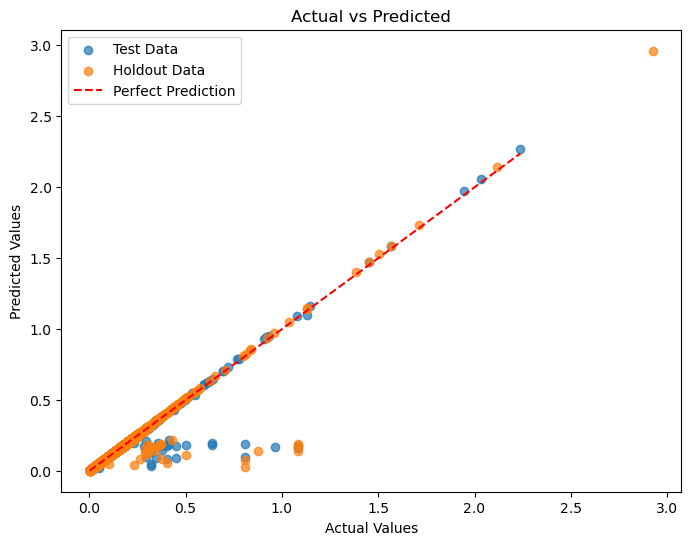

In [34]:
#Visualization
# Plot predicted vs actual for test data
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_test, alpha=0.7, label="Test Data")
plt.scatter(y_holdout, y_pred_holdout, alpha=0.7, label="Holdout Data")
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', label="Perfect Prediction")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted")
plt.legend()
plt.show()

#### 2.6. Random Forest

In [35]:
merged_session_rf = merged_sessions

# Select Features and Target
# Define target variable
target = 'utilization'

# Define features
X_rf = merged_session_rf[['session_duration', 'idle_time']] # features
y_rf = merged_session_rf['utilization'] # target variable

# Split dataset into training, testing and holdout sets
# X_train, X_test, y_train, y_test = train_test_split(X_rf, y_rf, test_size=0.4, random_state=42)
X_train, X_temp, y_train, y_temp = train_test_split(X_rf, y_rf, test_size=0.4, random_state=42)  # 40% temp (test + holdout)
X_test, X_holdout, y_test, y_holdout = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)  # Split temp 50/50

# Train model on 100 random trees on train set
rf_model = RandomForestRegressor(n_estimators=100, bootstrap=True, random_state=42) # we select boostrapp, i.e. we use bagging
rf_model.fit(X_train,y_train)

RandomForestRegressor(random_state=42)

In [36]:
# Predictions
y_pred_train = rf_model.predict(X_train)
y_pred_test = rf_model.predict(X_test)
y_pred_holdout = rf_model.predict(X_holdout)

# evaluate performance based on metrics on train and test set

# Evaluation on the training set
train_r2 = r2_score(y_train, y_pred_train)
train_mse = mean_squared_error(y_train, y_pred_train)

# Evaluation on the test set
test_r2 = r2_score(y_test, y_pred_test)
test_mse = mean_squared_error(y_test, y_pred_test)

#Evaluation on the holdout set
holdout_r2 = r2_score(y_holdout, y_pred_holdout)
holdout_mse = mean_squared_error(y_holdout, y_pred_holdout)

print("Train R²:", train_r2)
print("Train MSE:", train_mse)
print("Test R²:", test_r2)
print("Test MSE:", test_mse)
print("Holdout R²:", holdout_r2)
print("Holdout MSE:", holdout_mse)

Train R²: 0.9857736973152311
Train MSE: 0.00013202788264530358
Test R²: 0.9122111475704116
Test MSE: 0.0007785794774784307
Holdout R²: 0.9133063438263741
Holdout MSE: 0.0008585984293143047


In [37]:
# hyperparameter tuning
param_grid = {
    'n_estimators': [50, 100, 200], # no of trees
    'max_depth': [5, 10, 20], # depth of each tree
    'min_samples_split': [1, 2, 5], # no required to split
    'min_samples_leaf': [1, 2, 4] # min samples required to node
}

# training of holdout set
rf_model_cv = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=3, scoring='neg_mean_squared_error', n_jobs=-1)
rf_model_cv.fit(X_holdout, y_holdout)

c:\Users\angel\miniconda3\Lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
81 fits failed out of a total of 243.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
81 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\angel\miniconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\angel\miniconda3\Lib\site-packages\sklearn\base.py", line 1466, in wrapper
    estimator._validate_params()
  File "c:\Users\angel\miniconda3\Lib\site-packages\sklearn\base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "c:\Users\angel\miniconda3\Lib\site-pac

GridSearchCV(cv=3, estimator=RandomForestRegressor(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [5, 10, 20],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [1, 2, 5],
                         'n_estimators': [50, 100, 200]},
             scoring='neg_mean_squared_error')

In [38]:
print("Best hyperparameters:", rf_model_cv.best_params_)

Best hyperparameters: {'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}


In [39]:
# Predictions
y_pred_train = rf_model_cv.predict(X_train)
y_pred_test = rf_model_cv.predict(X_test)
y_pred_holdout = rf_model_cv.predict(X_holdout)

# evaluate performance based on metrics on train and test set

# Evaluation on the training set
train_r2 = r2_score(y_train, y_pred_train)
train_mse = mean_squared_error(y_train, y_pred_train)

# Evaluation on the test set
test_r2 = r2_score(y_test, y_pred_test)
test_mse = mean_squared_error(y_test, y_pred_test)

#Evaluation on the holdout set
holdout_r2 = r2_score(y_holdout, y_pred_holdout)
holdout_mse = mean_squared_error(y_holdout, y_pred_holdout)

print("Train R²:", train_r2)
print("Train MSE:", train_mse)
print("Test R²:", test_r2)
print("Test MSE:", test_mse)
print("Holdout R²:", holdout_r2)
print("Holdout MSE:", holdout_mse)

Train R²: 0.915743468706834
Train MSE: 0.0007819467694571418
Test R²: 0.9027591439156463
Test MSE: 0.0008624071601851146
Holdout R²: 0.9403183963836471
Holdout MSE: 0.0005910759031933476


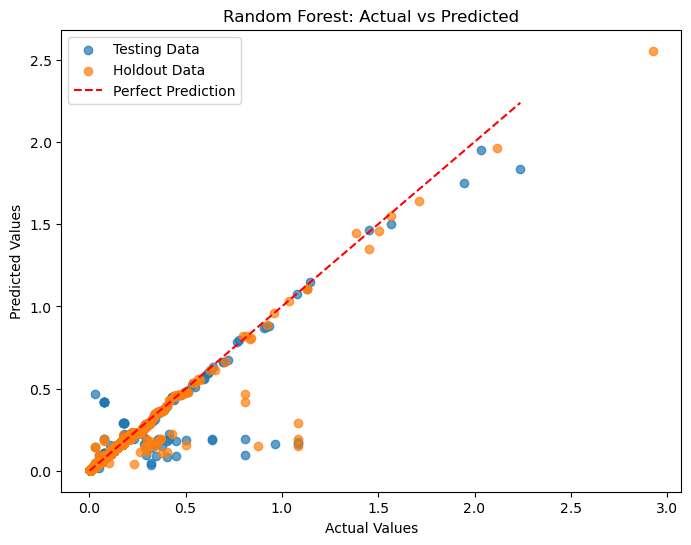

In [40]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_test , alpha=0.7, label="Testing Data")
plt.scatter(y_holdout, y_pred_holdout, alpha=0.7, label="Holdout Data")
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', label="Perfect Prediction")

plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Random Forest: Actual vs Predicted")
plt.legend()
plt.show()

#### 2.7. Neural network

The MLPRegressor (Multi-Layer Perceptron Regressor) in scikit-learn is a neural network model that implements a feedforward artificial neural network with fully connected layers, trained using backpropagation.

For this method we decided to include more features 

In [41]:
from sklearn.neural_network import MLPRegressor

# Conduct train test split
from sklearn.model_selection import train_test_split

X = merged_sessions[["siteID","WhPerMile","kWhRequested","minutesAvailable","is_weekday","session_duration","idle_time","avg_temperature","avg_precipitation","avg_windspeed", "hour_sin", "hour_cos"]]
y = merged_sessions['utilization']

# Split into train, validation and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.8, random_state=123)

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.5, random_state=123)

# Scale train data
NN_features = ["siteID","WhPerMile","kWhRequested","minutesAvailable","is_weekday","session_duration","idle_time","avg_temperature","avg_precipitation","avg_windspeed", "hour_sin", "hour_cos"]
X_NN_scale = X_train[["siteID","WhPerMile","kWhRequested","minutesAvailable","is_weekday","session_duration","idle_time","avg_temperature","avg_precipitation","avg_windspeed"]]
X_NN_exclude = X_train[["hour_sin","hour_cos"]]

# Scaling the chosen deatures except for hour_sin and hour_cos (these are naturally in scale)
X_NN_scaled = scaleStandard.fit_transform(X_NN_scale)
X_train = pd.DataFrame(
    np.hstack([X_NN_scaled, X_NN_exclude.values]),  # Combine scaled and unscaled features
    columns=NN_features # Keep the column names
)

# scale test data
X_NN_scale = X_val[["siteID","WhPerMile","kWhRequested","minutesAvailable","is_weekday","session_duration","idle_time","avg_temperature","avg_precipitation","avg_windspeed"]]
X_NN_exclude = X_val[["hour_sin","hour_cos"]]

# Scaling the chosen deatures except for hour_sin and hour_cos (these are naturally in scale)
X_NN_scaled = scaleStandard.fit_transform(X_NN_scale)
X_val = pd.DataFrame(
    np.hstack([X_NN_scaled, X_NN_exclude.values]),  # Combine scaled and unscaled features
    columns=NN_features # Keep the column names
)

# scale holdout data
X_NN_scale = X_test[["siteID","WhPerMile","kWhRequested","minutesAvailable","is_weekday","session_duration","idle_time","avg_temperature","avg_precipitation","avg_windspeed"]]
X_NN_exclude = X_test[["hour_sin","hour_cos"]]

# Scaling the chosen deatures except for hour_sin and hour_cos (these are naturally in scale)
X_NN_scaled = scaleStandard.fit_transform(X_NN_scale)
X_test = pd.DataFrame(
    np.hstack([X_NN_scaled, X_NN_exclude.values]),  # Combine scaled and unscaled features
    columns=NN_features # Keep the column names
)

param_grid = {
    'hidden_layer_sizes': [(100,), (100,50), (100, 50)],  # Different layer sizes
    'activation': ['relu', 'tanh'],  # Different activation functions
    'learning_rate_init': [0.001, 0.01, 0.1],  # Different learning rates
}
mlp = MLPRegressor(
    max_iter=100,     
)

# Grid search with 5-fold cross-validation on the training set
grid_search = GridSearchCV(mlp, param_grid, scoring='r2', cv=5)
grid_search.fit(X_train, y_train)
best_params = grid_search.best_params_
print(f"Best Hyperparameters: {best_params}")

Best Hyperparameters: {'activation': 'relu', 'hidden_layer_sizes': (100, 50), 'learning_rate_init': 0.01}


In [ ]:
# Initialize the hyperparameters with the best parameters
best_mlp = MLPRegressor(
    hidden_layer_sizes=best_params['hidden_layer_sizes'],
    activation=best_params['activation'],
    learning_rate_init=best_params['learning_rate_init'],
    max_iter=100,
    random_state=42
)
best_mlp.fit(X_train, y_train)

# Predictions
y_pred_train = best_mlp.predict(X_train)
y_pred_val = best_mlp.predict(X_val)

# Evaluate the model
train_r2 = r2_score(y_train, y_pred_train)
val_r2 = r2_score(y_val, y_pred_val)
train_mse = mean_squared_error(y_train, y_pred_train)
val_mse = mean_squared_error(y_val, y_pred_val)

print("1. Validation")
print("Train R²:", train_r2)
print("Train MSE:", train_mse)
print("Validation R²:", val_r2)
print("Validation MSE:", val_mse)

# Tuning around best parameters
fine_tuned_param_grid = {
    'hidden_layer_sizes': [(100,10),(100,20),(100,30),(100,40),(100,50),(100,60),(100,70)],
    'learning_rate_init': [best_params['learning_rate_init'] / 2, best_params['learning_rate_init'], best_params['learning_rate_init'] * 2],
}
grid_search_fine = GridSearchCV(mlp, fine_tuned_param_grid, scoring='r2', cv=5)
grid_search_fine.fit(X_train, y_train)
better_params = grid_search_fine.best_params_
print(f"Fine-Tuned Best Parameters: {better_params}")

tuned_mlp = MLPRegressor(
    hidden_layer_sizes=better_params['hidden_layer_sizes'],
    activation=best_params['activation'],
    learning_rate_init=better_params['learning_rate_init'],
    max_iter=100,
    random_state=42
)

tuned_mlp.fit(X_train, y_train) 

# Predictions
y_pred_train = tuned_mlp.predict(X_train)
y_pred_val = tuned_mlp.predict(X_val)
train_r2 = r2_score(y_train, y_pred_train)
val_r2 = r2_score(y_val, y_pred_val)
train_mse = mean_squared_error(y_train, y_pred_train)
val_mse = mean_squared_error(y_val, y_pred_val)

print("2. Validation")
print("Train R²:", train_r2)
print("Train MSE:", train_mse)
print("Validation R²:", val_r2)
print("Validation MSE:", val_mse)

1. Validation
Train R²: 0.9273476823591206
Train MSE: 0.0005410298876057795
Validation R²: 0.7982944014153036
Validation MSE: 0.003498016210349023


In [43]:
# Final evaluation
y_pred_test = tuned_mlp.predict(X_test)
test_r2 = r2_score(y_test, y_pred_test)
test_mse = mean_squared_error(y_test, y_pred_test)
print("Holdout R²:", test_r2)
print("Holdout MSE:", test_mse)

Holdout R²: 0.9300339065395067
Holdout MSE: 0.000598469405592397


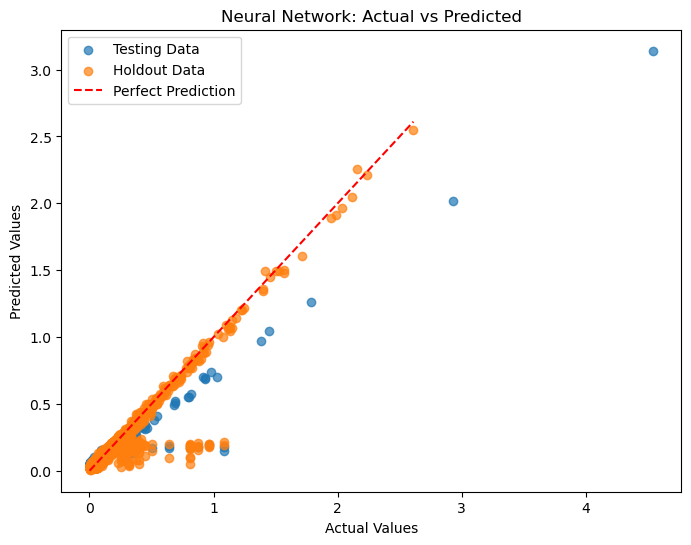

In [44]:
plt.figure(figsize=(8, 6))
plt.scatter(y_val, y_pred_val , alpha=0.7, label="Testing Data")
plt.scatter(y_test, y_pred_test, alpha=0.7, label="Holdout Data")
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', label="Perfect Prediction")

plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Neural Network: Actual vs Predicted")
plt.legend()
plt.show()

### 3. Developing Predictive Models

#### 3.1. Train Models

#### 3.2. Cross-Validation

#### 3.3. Performance Evaluation

### 4. Examples for Business Case

#### 4.1. Visualizing Prediction Data

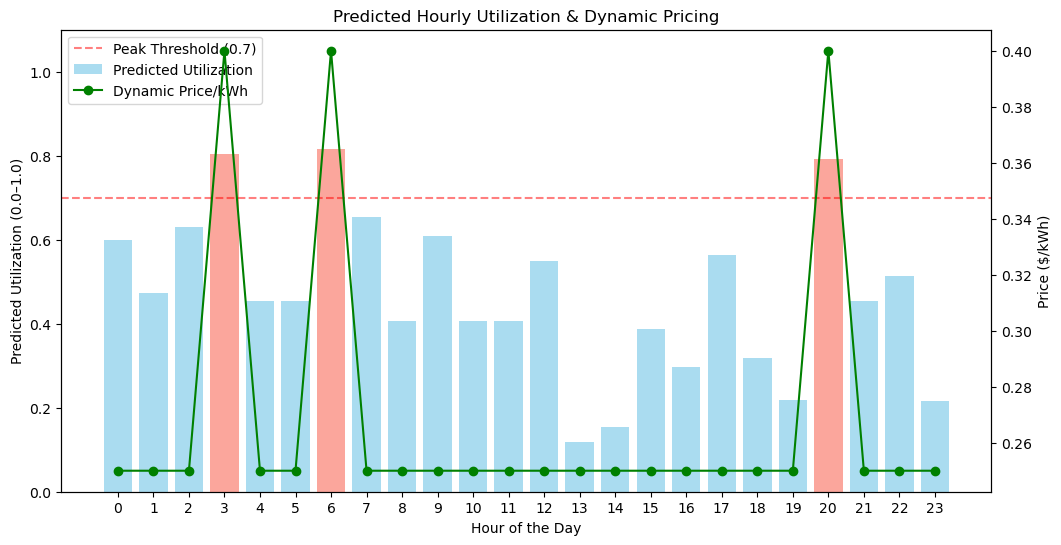

Hourly Predicted Utilization & Dynamic Price:
     hour  predicted_utilization  price_per_kWh  is_peak
0      0               0.599343           0.25    False
1      1               0.472347           0.25    False
2      2               0.629538           0.25    False
3      3               0.804606           0.40     True
4      4               0.453169           0.25    False
5      5               0.453173           0.25    False
6      6               0.815843           0.40     True
7      7               0.653487           0.25    False
8      8               0.406105           0.25    False
9      9               0.608512           0.25    False
10    10               0.407316           0.25    False
11    11               0.406854           0.25    False
12    12               0.548392           0.25    False
13    13               0.117344           0.25    False
14    14               0.155016           0.25    False
15    15               0.387542           0.25    False
1

In [45]:

# Simulate predicted utilization data for a single site over 24 hours
#    In a real scenario, you'd have actual predictions from your trained model.
np.random.seed(42)
hours = np.arange(24)
# Let's assume predicted utilization values range between 0.0 and 1.0 (0% to 100%)
predicted_utilization = np.random.normal(loc=0.5, scale=0.2, size=24)
predicted_utilization = np.clip(predicted_utilization, 0, 1)  # Ensure within [0,1]

# Define a function to decide dynamic pricing based on predicted utilization
#    For instance, if utilization >= 70%, we set a "peak" price, else an "off-peak" price.
def determine_price(util):
    if util >= 0.7:
        return 0.40  # Example: 0.40 $/kWh at peak
    else:
        return 0.25  # Example: 0.25 $/kWh off-peak

prices = [determine_price(u) for u in predicted_utilization]

# Combine into a DataFrame for easy manipulation
data = {
    "hour": hours,
    "predicted_utilization": predicted_utilization,
    "price_per_kWh": prices
}
df = pd.DataFrame(data)

# Show how the price changes based on predicted utilization
#    We’ll mark hours that exceed a threshold (e.g., 70%).
peak_threshold = 0.7
df["is_peak"] = df["predicted_utilization"] >= peak_threshold

# Visualize in a bar chart: hour vs. predicted utilization
fig, ax1 = plt.subplots(figsize=(12,6))

# Plot utilization bars
colors = df["is_peak"].map({True: "salmon", False: "skyblue"})
ax1.bar(df["hour"], df["predicted_utilization"], color=colors, alpha=0.7, label="Predicted Utilization")
ax1.set_xlabel("Hour of the Day")
ax1.set_ylabel("Predicted Utilization (0.0–1.0)")
ax1.set_ylim(0, 1.1)
ax1.set_xticks(range(24))
ax1.set_title("Predicted Hourly Utilization & Dynamic Pricing")

# We'll add a horizontal line to indicate the threshold
ax1.axhline(y=peak_threshold, color="red", linestyle="--", alpha=0.5, label="Peak Threshold (0.7)")

# Plot a second axis for the Price over the same hours
ax2 = ax1.twinx()
ax2.plot(df["hour"], df["price_per_kWh"], color="green", marker="o", label="Dynamic Price/kWh")
ax2.set_ylabel("Price ($/kWh)")

# Build a combined legend
h1, l1 = ax1.get_legend_handles_labels()
h2, l2 = ax2.get_legend_handles_labels()
ax1.legend(h1 + h2, l1 + l2, loc="upper left")

plt.show()

# Print out the DataFrame for clarity
print("Hourly Predicted Utilization & Dynamic Price:\n", df)


#### 4.2. Example Prediction